In [98]:
print(__doc__)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy  
from scipy import linalg

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale  
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import itertools

from sklearn import mixture


style.use("ggplot")
%matplotlib inline



Automatically created module for IPython interactive environment


In [99]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [100]:
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data1_Car/car.csv')
#convert buying to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['buying'] = raw_data.buying.str.replace('vhigh','0')
raw_data['buying'] = raw_data.buying.str.replace('high','1')
raw_data['buying'] = raw_data.buying.str.replace('med','2')
raw_data['buying'] = raw_data.buying.str.replace('low','3')
data=raw_data
data['buying']=raw_data.buying
data['buying']=data.buying.astype(int)

In [101]:
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data1_Car/car.csv')
#convert buying to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['buying'] = raw_data.buying.str.replace('vhigh','0')
raw_data['buying'] = raw_data.buying.str.replace('high','1')
raw_data['buying'] = raw_data.buying.str.replace('med','2')
raw_data['buying'] = raw_data.buying.str.replace('low','3')
data=raw_data
data['buying']=raw_data.buying
data['buying']=data.buying.astype(int)

In [102]:
#convert maint to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['maint'] = raw_data.maint.str.replace('vhigh','0')
raw_data['maint'] = raw_data.maint.str.replace('high','1')
raw_data['maint'] = raw_data.maint.str.replace('med','2')
raw_data['maint'] = raw_data.maint.str.replace('low','3')
data['maint']=raw_data.maint
data['maint']=data.maint.astype(int)

In [103]:
#convert doors, 5more ->5, all to int
raw_data['doors'] = raw_data.doors.str.replace('5more','5')
data['doors']=raw_data.doors
data['doors']=data.doors.astype(int)

In [104]:
#persons more->5, all to int
raw_data['persons'] = raw_data.persons.str.replace('more','5')
data['persons']=raw_data.persons
data['persons']=data.persons.astype(int)

In [105]:
#lug_boot, small->0, med->1, big->2, all to int
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('small','0')
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('med','1')
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('big','2')
data['lug_boot']=raw_data.lug_boot
data['lug_boot']=data.lug_boot.astype(int)

In [106]:
#safety, low->0, med->1, high->2
raw_data['safety'] = raw_data.safety.str.replace('low','0')
raw_data['safety'] = raw_data.safety.str.replace('med','1')
raw_data['safety'] = raw_data.safety.str.replace('high','2')
data['safety']=raw_data.safety
data['safety']=data.safety.astype(int)

In [107]:
#set label column
data['acceptable_label'] = raw_data.acceptable

In [108]:
#acceptable, unacc->0, acc->1, good->2, vgood->3
raw_data['acceptable'] = raw_data.acceptable.str.replace('unacc','0')
raw_data['acceptable'] = raw_data.acceptable.str.replace('acc','1')
raw_data['acceptable'] = raw_data.acceptable.str.replace('good','2')
raw_data['acceptable'] = raw_data.acceptable.str.replace('v2','3')
data['acceptable']=raw_data.acceptable
data['acceptable']=data.acceptable.astype(int)
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable,acceptable_label
0,0,0,2,2,0,0,0,unacc
1,0,0,2,2,0,1,0,unacc
2,0,0,2,2,0,2,0,unacc
3,0,0,2,2,1,0,0,unacc
4,0,0,2,2,1,1,0,unacc


In [109]:
datalist_label = data.acceptable
datalist_names = data.acceptable_label
datalist_label_names = np.array(['unacc','acc','good','vgood'])
datalist = data.drop(['acceptable','acceptable_label'], axis=1)
datalist_array = datalist.values
datalist_array

array([[0, 0, 2, 2, 0, 0],
       [0, 0, 2, 2, 0, 1],
       [0, 0, 2, 2, 0, 2],
       ..., 
       [3, 3, 5, 5, 2, 0],
       [3, 3, 5, 5, 2, 1],
       [3, 3, 5, 5, 2, 2]])

In [110]:
EM_data = data.drop(['buying','maint','doors','persons','lug_boot','safety'], axis=1)

In [111]:
#NN  on X = datalist_array, y = datalist_label
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import StratifiedKFold
import time
from sklearn.neural_network import MLPClassifier

skf = StratifiedKFold(datalist_label, n_folds=4)
# Only take the first fold.
train_index, test_index = next(iter(skf))


X_train = datalist_array[train_index]
y_train = datalist_label[train_index].values
X_test  = datalist_array[test_index]
y_test  = datalist_label[test_index].values

In [112]:
#Implement ICA
from scipy import signal
from sklearn.decomposition import FastICA
# #############################################################################
# Generate sample data
Y=datalist_array

# Mix data
A = np.array([[3, 3, 3, 3, 3, 3], 
              [0.5, 1, 1.5, 2, 2.5, 3], 
              [3, 2, 1, 1, 2, 3],
              [1, 2, 3, 3, 2, 1], 
              [1, 3, 1.5, 2.5, 1, 2], 
              [1.5, 1, 2, 2.5, 0.5, 1.5]           
             ])  # Mixing matrix
Y_general = np.dot(Y,A.T)  # Generate observations

In [113]:
#original Kurtosis
scipy.stats.kurtosis(Y, fisher=False)

array([ 1.64,  1.64,  1.64,  1.5 ,  1.5 ,  1.5 ])

In [114]:
# Compute ICA
#  Higher values indicate a higher, sharper peak; lower values indicate a lower, less distinct peak
#if non-Fisher Kurtosis, nomral distribution is 3.  Closer to normal distribution is better for ML.
for i in range(1,6):
    ica = FastICA(n_components=i)
    S_ = ica.fit_transform(Y_general)  # Reconstruct signals
    print ('component: ', i, ', Kurtosis: ', scipy.stats.kurtosis(S_, fisher=False))

component:  1 , Kurtosis:  [ 2.71758641]
component:  2 , Kurtosis:  [ 2.50040775  2.35506803]
component:  3 , Kurtosis:  [ 2.32092341  2.3542297   2.29663382]
component:  4 , Kurtosis:  [ 1.90094513  2.21419587  2.30839664  1.78021104]
component:  5 , Kurtosis:  [ 1.75197303  1.94901445  1.67780276  1.93657179  2.14444267]


In [115]:
#try new S_ in K-means
ica = FastICA(n_components=2)
data_ICA = ica.fit_transform(Y_general)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
data_ICA

array([[ 0.05596511, -0.0519    ],
       [ 0.04090913, -0.05131911],
       [ 0.02585314, -0.05073821],
       ..., 
       [-0.02627408,  0.04586547],
       [-0.04133007,  0.04644636],
       [-0.05638605,  0.04702726]])

In [116]:
#Try NN
#NN upon ICA dataset
from sklearn.metrics import explained_variance_score

X_train = data_ICA[train_index]
y_train = datalist_label[train_index].values
X_test  = data_ICA[test_index]
y_test  = datalist_label[test_index].values

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 1.35361396
Iteration 2, loss = 0.88199969
Iteration 3, loss = 0.86187014
Iteration 4, loss = 0.84517502
Iteration 5, loss = 0.83649467
Iteration 6, loss = 0.83374800
Iteration 7, loss = 0.83230253
Iteration 8, loss = 0.83326242
Iteration 9, loss = 0.83268482
Iteration 10, loss = 0.83168629
Iteration 11, loss = 0.83205935
Iteration 12, loss = 0.83175982
Iteration 13, loss = 0.83140275
Iteration 14, loss = 0.83179275
Iteration 15, loss = 0.83122425
Iteration 16, loss = 0.83089205
Iteration 17, loss = 0.83155289
Iteration 18, loss = 0.83089045
Iteration 19, loss = 0.83041986
Iteration 20, loss = 0.83060519
Iteration 21, loss = 0.83025380
Iteration 22, loss = 0.82974284
Iteration 23, loss = 0.83008728
Iteration 24, loss = 0.82963019
Iteration 25, loss = 0.82956318
Iteration 26, loss = 0.82916336
Iteration 27, loss = 0.82894836
Iteration 28, loss = 0.82926827
Iteration 29, loss = 0.82864555
Iteration 30, loss = 0.82894855
Iteration 31, loss = 0.82815466
Iteration 32, los

In [117]:
#EM, Try GMMs with K=4
new_component=4
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_ICA)
datalist_pred = gmm.predict(data_ICA)

EM_data['K4_ICA_label']=datalist_pred
K4_ICA_label = datalist_pred
K4_ICA_label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [118]:
tb1 = pd.crosstab(EM_data['acceptable_label'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3
acceptable_label,,,,
acc,233,7,72,72
good,58,0,11,0
unacc,118,391,307,394
vgood,58,0,7,0


In [119]:
#EM assign test K=4 label
def em_K1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(4))
    if tb1.iloc[0,alpha] == label_max:
        return 'acc'
    if tb1.iloc[1,alpha] == label_max:
        return 'good'
    if tb1.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb1.iloc[3,alpha] == label_max:
        return 'vgood'
EM_data['K4_ICA_label_name']=EM_data['K4_ICA_label'].apply(em_K1_label)
EM_data.head()

,acceptable,acceptable_label,K4_ICA_label,K4_ICA_label_name
0,0,unacc,1,unacc
1,0,unacc,1,unacc
2,0,unacc,1,unacc
3,0,unacc,1,unacc
4,0,unacc,1,unacc


In [120]:
K4_ICA_accuracy = len(EM_data[EM_data['acceptable_label']==EM_data['K4_ICA_label_name']])/len(EM_data)
print('K=4 ICA EM -> {0:.4f}%'.format(K4_ICA_accuracy*100))

K=4 ICA EM -> 76.6782%


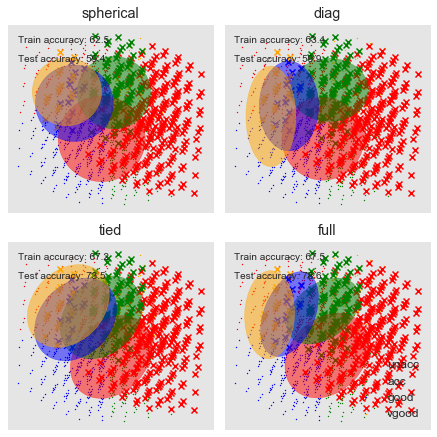

In [121]:
# Try GMMs using different types of covariances. K=4, iteration=200
n_classes=4
X_train = data_ICA[train_index]
y_train = datalist_label[train_index]
X_test  = data_ICA[test_index]
y_test  = datalist_label[test_index]
colors= ['red', 'green', 'blue', 'orange']
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=200, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = data_ICA[K4_ICA_label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=datalist_label_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [122]:
# EM K=14, full
new_component=14
cv_type='spherical'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_ICA)
datalist_pred = gmm.predict(data_ICA)

EM_data['K14_ICA_label']=datalist_pred
K14_ICA_label = datalist_pred

In [123]:
tb1 = pd.crosstab(EM_data['acceptable_label'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
acceptable_label,,,,,,,,,,,,,,
acc,6,70,6,9,0,132,52,0,67,33,6,0,2,1
good,22,0,0,0,0,0,9,0,8,30,0,0,0,0
unacc,21,190,83,122,62,110,73,57,21,11,161,105,64,130
vgood,28,0,0,0,0,0,1,0,2,33,0,0,1,0


In [124]:
#EM: assign test K=14 label

EM_data['K14_ICA_label_name']=EM_data['K14_ICA_label'].apply(em_K1_label)
EM_data.head()

,acceptable,acceptable_label,K4_ICA_label,K4_ICA_label_name,K14_ICA_label,K14_ICA_label_name
0,0,unacc,1,unacc,7,unacc
1,0,unacc,1,unacc,7,unacc
2,0,unacc,1,unacc,4,unacc
3,0,unacc,1,unacc,7,unacc
4,0,unacc,1,unacc,4,unacc


In [125]:
K14_ICA_accuracy = len(EM_data[EM_data['acceptable_label']==EM_data['K14_ICA_label_name']])/len(EM_data)
print('K=14 ICA EM -> {0:.4f}%'.format(K14_ICA_accuracy*100))

K=14 ICA EM -> 75.6366%


In [126]:
#K-means
data_ICA_df = pd.DataFrame(data=data_ICA[0:,0:],
                   columns=['ICA1','ICA2'])
data_ICA_df['acceptable'] = datalist_label
data_ICA_df.to_csv('data_ICA_NN.csv' , sep=',')
data_ICA_df['acceptable_label'] = datalist_names
data_ICA_df.head()

,ICA1,ICA2,acceptable,acceptable_label
0,0.055965,-0.051900,0,unacc
1,0.040909,-0.051319,0,unacc
2,0.025853,-0.050738,0,unacc
3,0.047073,-0.048193,0,unacc
4,0.032017,-0.047612,0,unacc


In [127]:
#EM treated for NN
#choose K14_ICA_label 

data_ICA_EM_NN_df = pd.DataFrame(data=data_ICA[0:,0:],
                   columns=['ICA1','ICA2'])
data_ICA_EM_NN_df['ICA14_label'] = EM_data['K14_ICA_label']
data_ICA_EM_NN=data_ICA_EM_NN_df.values

In [128]:
data_ICA_EM_NN_df.to_csv('data_ICA_EM.csv' , sep=',')

In [129]:
#NN upon PCA EM K=20 dataset
X_train = data_ICA_EM_NN[train_index]
y_train = datalist_label[train_index]
X_test  = data_ICA_EM_NN[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 1.45899228
Iteration 2, loss = 0.96262680
Iteration 3, loss = 0.88560500
Iteration 4, loss = 0.85319699
Iteration 5, loss = 0.86107556
Iteration 6, loss = 0.81790059
Iteration 7, loss = 0.81259855
Iteration 8, loss = 0.81217487
Iteration 9, loss = 0.80103266
Iteration 10, loss = 0.79234691
Iteration 11, loss = 0.79891510
Iteration 12, loss = 0.78273316
Iteration 13, loss = 0.77724397
Iteration 14, loss = 0.77189040
Iteration 15, loss = 0.76557111
Iteration 16, loss = 0.76191645
Iteration 17, loss = 0.75885264
Iteration 18, loss = 0.74975710
Iteration 19, loss = 0.75170056
Iteration 20, loss = 0.74475444
Iteration 21, loss = 0.73836833
Iteration 22, loss = 0.73237757
Iteration 23, loss = 0.72786504
Iteration 24, loss = 0.73166256
Iteration 25, loss = 0.71896686
Iteration 26, loss = 0.71624093
Iteration 27, loss = 0.70824480
Iteration 28, loss = 0.70685881
Iteration 29, loss = 0.69810702
Iteration 30, loss = 0.70529861
Iteration 31, loss = 0.69828597
Iteration 32, los

In [130]:
data_ICA_df.describe()

,ICA1,ICA2,acceptable
count,1.728000e+03,1.728000e+03,1728.000000
mean,4.790567e-18,-2.851050e-19,0.414931
std,2.406322e-02,2.406322e-02,0.740700
min,-6.128931e-02,-5.945824e-02,0.000000
25%,-1.782733e-02,-1.675597e-02,0.000000
50%,-2.104702e-04,8.283199e-04,0.000000
75%,1.779870e-02,1.828417e-02,1.000000
max,6.086836e-02,5.458549e-02,3.000000


In [131]:
data_ICA_df.pivot_table(index='acceptable_label', values=['ICA1','ICA2'],aggfunc=np.mean)

,ICA1,ICA2
acceptable_label,,
acc,-0.009703,0.014027
good,-0.032856,0.016881
unacc,0.007193,-0.006498
vgood,-0.041697,0.020176


In [132]:
d_corr_ICA1=data_ICA_df.iloc[:,[0,1,2]].corr()
d_corr_ICA1


,ICA1,ICA2,acceptable
ICA1,1.000000e+00,8.231263e-16,-0.532493
ICA2,8.231263e-16,1.000000e+00,0.378481
acceptable,-5.324931e-01,3.784811e-01,1.000000


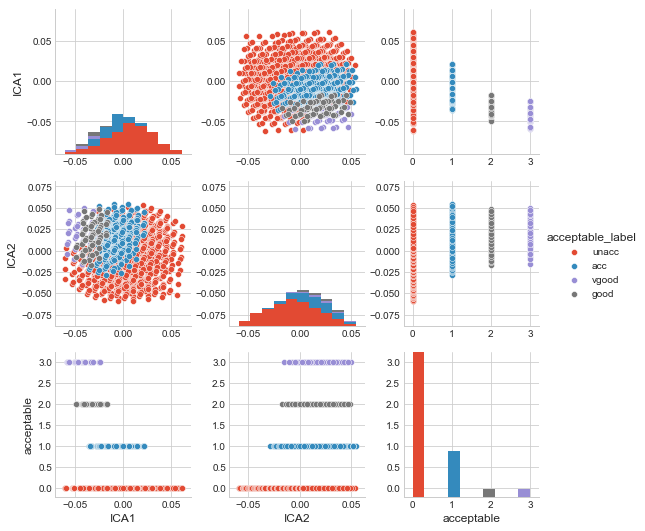

In [133]:
sns.set_style('whitegrid')
sns.pairplot(data_ICA_df.iloc[:,[0,1,2,3]], hue='acceptable_label')
plt.show()

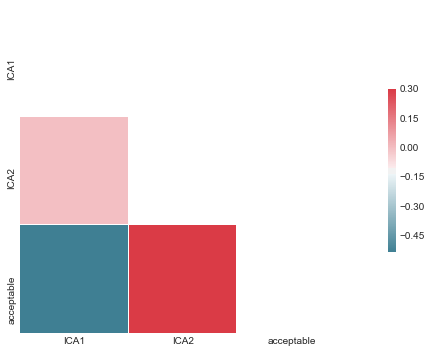

In [134]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr_ICA1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr_ICA1,mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

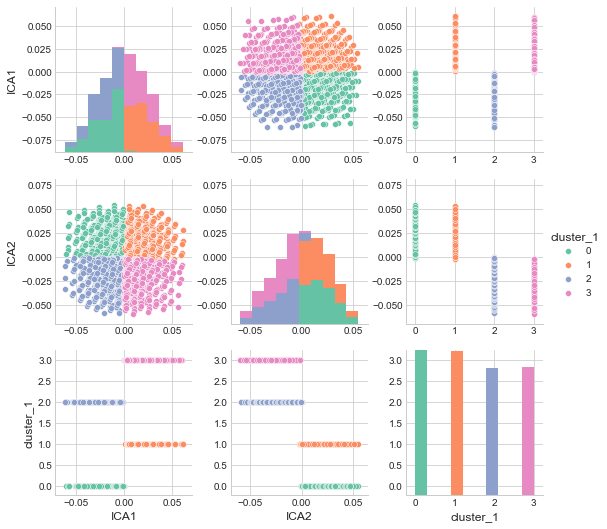

In [135]:
#K=4 K-means
kmeans_model_1 = KMeans(n_clusters=4,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data_ICA_df.iloc[:,0:2])
labels_1 = kmeans_model_1.labels_
data_ICA_df['cluster_1']=labels_1
with sns.color_palette("Set2", 10):
    sns.pairplot(data_ICA_df.iloc[:,[0,1,4]], hue='cluster_1')

In [136]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data_ICA_df['acceptable_label'],labels_1)
tb1

col_0,0,1,2,3
acceptable_label,,,,
acc,232,71,74,7
good,58,0,11,0
unacc,112,387,312,399
vgood,58,0,7,0


In [137]:
#cluster_1_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(4))
    if tb1.iloc[0,alpha] == label_max:
        return 'acc'
    if tb1.iloc[1,alpha] == label_max:
        return 'good'
    if tb1.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb1.iloc[3,alpha] == label_max:
        return 'vgood'
data_ICA_df['cluster_1_label']=data_ICA_df['cluster_1'].apply(cluster_1_label)
data_ICA_df.head()

,ICA1,ICA2,acceptable,acceptable_label,cluster_1,cluster_1_label
0,0.055965,-0.051900,0,unacc,3,unacc
1,0.040909,-0.051319,0,unacc,3,unacc
2,0.025853,-0.050738,0,unacc,3,unacc
3,0.047073,-0.048193,0,unacc,3,unacc
4,0.032017,-0.047612,0,unacc,3,unacc


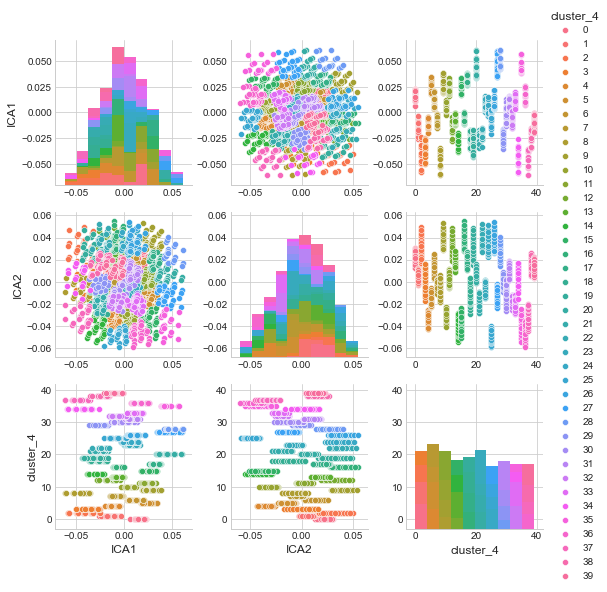

In [138]:
#K=40
kmeans_model_4 = KMeans(n_clusters=40,random_state=123)
distances_4 = kmeans_model_4.fit_transform(data_ICA_df.iloc[:,0:3])
labels_4 = kmeans_model_4.labels_
data_ICA_df['cluster_4']=labels_4
with sns.color_palette("Set2", 10):
    sns.pairplot(data_ICA_df.iloc[:,[0,1,6]], hue='cluster_4')

In [139]:
#compare labels K=40
tb4 = pd.crosstab(data_ICA_df['acceptable_label'],labels_4)
tb4

col_0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
acceptable_label,,,,,,,,,,,,,,,,,,,,,
acc,0,54,0,0,0,0,36,0,0,0,...,40,0,0,0,0,0,0,0,42,0
good,0,0,0,33,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unacc,59,0,0,0,47,65,0,55,27,42,...,0,68,55,56,0,20,35,29,0,49
vgood,0,0,40,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0


In [140]:
#cluster_4_label
def cluster_4_label(alpha):
    label_max = max(tb4.iloc[i,alpha] for i in range(4))
    if tb4.iloc[0,alpha] == label_max:
        return 'acc'
    if tb4.iloc[1,alpha] == label_max:
        return 'good'
    if tb4.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb4.iloc[3,alpha] == label_max:
        return 'vgood'
data_ICA_df['cluster_4_label']=data_ICA_df['cluster_4'].apply(cluster_4_label)
data_ICA_df.head()

,ICA1,ICA2,acceptable,acceptable_label,cluster_1,cluster_1_label,cluster_4,cluster_4_label
0,0.055965,-0.051900,0,unacc,3,unacc,35,unacc
1,0.040909,-0.051319,0,unacc,3,unacc,35,unacc
2,0.025853,-0.050738,0,unacc,3,unacc,36,unacc
3,0.047073,-0.048193,0,unacc,3,unacc,35,unacc
4,0.032017,-0.047612,0,unacc,3,unacc,15,unacc


In [141]:
#find center of K-means=4
centroids_ICA1 = kmeans_model_1.cluster_centers_
print (centroids_ICA1)

[[-0.01899216  0.01927091]
 [ 0.0203739   0.01793366]
 [-0.02048034 -0.02041751]
 [ 0.01891429 -0.02174769]]


In [142]:
#find center of K-means=40
centroids_ICA4 = kmeans_model_4.cluster_centers_

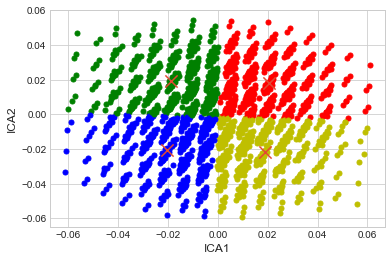

In [143]:
#ICA K=4, upon cluster_1
colors = ["g.", "r.", "b.", "y."]
for i in range(len(data_ICA_df)):
    plt.plot(data_ICA_df.iloc[i,0],data_ICA_df.iloc[i,1], colors[data_ICA_df.iloc[i,4]], markersize = 10)    
plt.scatter(centroids_ICA1[:,0], centroids_ICA1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.show()


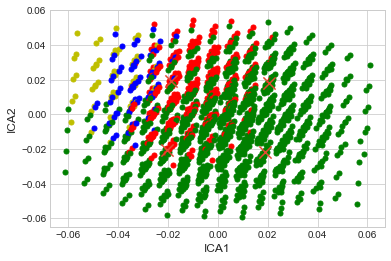

In [144]:
#ICA K=4 upon original label
colors = ["g.", "r.", "b.", "y."]
for i in range(len(data_ICA_df)):
    plt.plot(data_ICA_df.iloc[i,0],data_ICA_df.iloc[i,1], colors[data_ICA_df.iloc[i,2]], markersize = 10)    
plt.scatter(centroids_ICA1[:,0], centroids_ICA1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.show()


In [145]:
data_ICA_df.head()

,ICA1,ICA2,acceptable,acceptable_label,cluster_1,cluster_1_label,cluster_4,cluster_4_label
0,0.055965,-0.051900,0,unacc,3,unacc,35,unacc
1,0.040909,-0.051319,0,unacc,3,unacc,35,unacc
2,0.025853,-0.050738,0,unacc,3,unacc,36,unacc
3,0.047073,-0.048193,0,unacc,3,unacc,35,unacc
4,0.032017,-0.047612,0,unacc,3,unacc,15,unacc


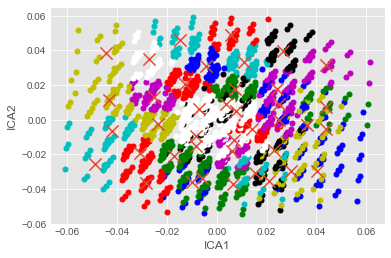

In [88]:
#ICA K=40 upon cluster_4
style.use("ggplot")
colors = ["g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w."]
for i in range(len(data_ICA_df)):
    plt.plot(data_ICA_df.iloc[i,0],data_ICA_df.iloc[i,1], colors[data_ICA_df.iloc[i,6]], markersize = 10)    
plt.scatter(centroids_ICA4[:,0], centroids_ICA4[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.show()

In [146]:
d_corr_ICA1=data_ICA_df.iloc[:,[0,1,4]].corr()
d_corr_ICA1
#Correlation K=4 for dataset after ICA

,ICA1,ICA2,cluster_1
ICA1,1.000000e+00,8.231263e-16,0.340625
ICA2,8.231263e-16,1.000000e+00,-0.748660
cluster_1,3.406250e-01,-7.486601e-01,1.000000


In [147]:
d_corr_ICA4=data_ICA_df.iloc[:,[0,1,6]].corr()
d_corr_ICA4

,ICA1,ICA2,cluster_4
ICA1,1.000000e+00,8.231263e-16,0.012685
ICA2,8.231263e-16,1.000000e+00,-0.148299
cluster_4,1.268501e-02,-1.482987e-01,1.000000


In [148]:
cluster_1_accuracy = len(data_ICA_df[data_ICA_df['acceptable_label']==data_ICA_df['cluster_1_label']])/len(data_ICA_df)
cluster_4_accuracy = len(data_ICA_df[data_ICA_df['acceptable_label']==data_ICA_df['cluster_4_label']])/len(data_ICA_df)
print('K=4 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))
print('K=40 KMeans -> {0:.4f}%'.format(cluster_4_accuracy*100))

K=4 KMeans -> 76.9676%
K=40 KMeans -> 100.0000%


In [149]:
data_ICA_df.describe()

,ICA1,ICA2,acceptable,cluster_1,cluster_4
count,1.728000e+03,1.728000e+03,1728.000000,1728.000000,1728.000000
mean,4.790567e-18,-2.851050e-19,0.414931,1.437500,18.688657
std,2.406322e-02,2.406322e-02,0.740700,1.117645,11.556375
min,-6.128931e-02,-5.945824e-02,0.000000,0.000000,0.000000
25%,-1.782733e-02,-1.675597e-02,0.000000,0.000000,9.000000
50%,-2.104702e-04,8.283199e-04,0.000000,1.000000,18.000000
75%,1.779870e-02,1.828417e-02,1.000000,2.000000,29.000000
max,6.086836e-02,5.458549e-02,3.000000,3.000000,39.000000


In [150]:
data_ICA_KM_NN_df = pd.DataFrame(data=data_ICA[0:,0:],
                   columns=['ICA1','ICA2'])
data_ICA_KM_NN_df['K40_label'] = data_ICA_df['cluster_4']
data_ICA_KM_NN_df.to_csv('data_ICA_KM.csv' , sep=',')